# Activity 7 - Dummy Variables

For this activity, we will use the Austin, Texas weather dataset that we used in the
previous activity. In this activity, we will use dummy variables to enhance our linear
regression model for this dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
    
# Loading the data from activity 1
df = pd.read_csv('activity2_measurements.csv')
df_first_year = pd.read_csv('activity_first_year.csv')
rolling = pd.read_csv('activity2_rolling.csv')
window = 20

# Trendline values
trend_x = np.array([
    1,
    182.5,
    365
])

Plot the raw data (df) and moving average (rolling)

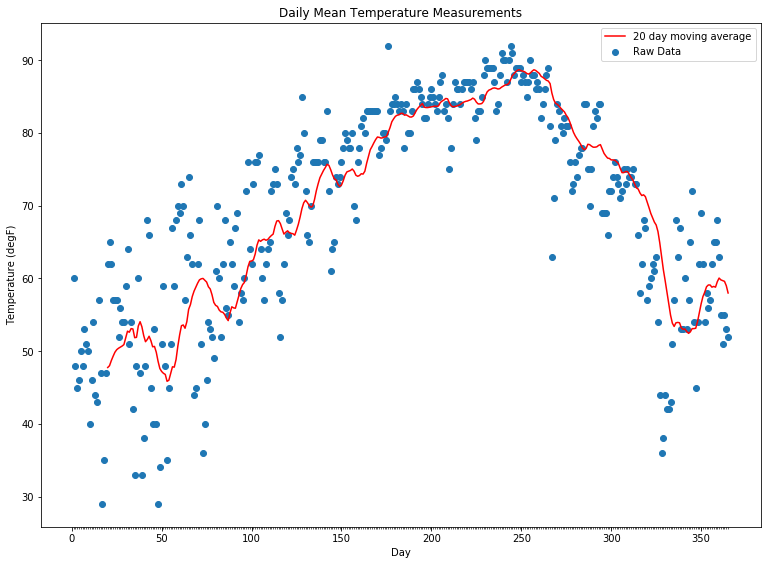

In [2]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);

# Temp measurements
ax.scatter(df_first_year.DayOfYear, df_first_year.TempAvgF, label='Raw Data');
ax.plot(df_first_year.DayOfYear, rolling, c='r', label=f'{window} day moving average');

ax.set_title('Daily Mean Temperature Measurements')
ax.set_xlabel('Day')
ax.set_ylabel('Temperature (degF)')
ax.set_xticks(range(1, 366), 10)
ax.legend();

Looking at the above plot, there seems to be an inflection point around day 250.  Create a dummy variable to introduce this feature into the linear model.

In [3]:
df_first_year.loc[:,'inflection'] = [1 * int(i < 250) for i in df_first_year.DayOfYear]

Check the first and last samples to confirm the dummy variable is correct

In [4]:
df_first_year.head()

,Date,TempAvgF,Year,Month,DayOfYear,inflection,DayOfYear2
0,2013-12-21,60,2013,12,1,1,0.002740
1,2013-12-22,48,2013,12,2,1,0.005479
2,2013-12-23,45,2013,12,3,1,0.008219
3,2013-12-24,46,2013,12,4,1,0.010959
4,2013-12-25,50,2013,12,5,1,0.013698


In [5]:
df_first_year.tail()

,Date,TempAvgF,Year,Month,DayOfYear,inflection,DayOfYear2
360,2014-12-16,55,2014,12,361,0,0.835499
361,2014-12-17,51,2014,12,362,0,0.837002
362,2014-12-18,55,2014,12,363,0,0.838498
363,2014-12-19,53,2014,12,364,0,0.839988
364,2014-12-20,52,2014,12,365,0,0.841471


Use a least squares linear regression model and fit the model to the DayOfYear values and the dummy variable to predict TempAvgF

In [6]:
# Note the year values need to be provided as an N x 1 array
model = LinearRegression()
model.fit(df_first_year[['DayOfYear', 'inflection']], df_first_year.TempAvgF)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Compute the $r^2$ score

In [7]:
# Note the year values need to be provided as an N x 1 array
r2 = model.score(df_first_year[['DayOfYear', 'inflection']], df_first_year.TempAvgF)
print(f'r2 score = {r2:0.4f}')

r2 score = 0.3631


Using the DayOfYear values create a set of predictions using the model to construct a trendline

In [8]:
trend_y = model.predict(df_first_year[['DayOfYear', 'inflection']].values)
trend_y

array([51.60311133, 51.74622654, 51.88934175, 52.03245696, 52.17557217,
       52.31868739, 52.4618026 , 52.60491781, 52.74803302, 52.89114823,
       53.03426345, 53.17737866, 53.32049387, 53.46360908, 53.60672429,
       53.7498395 , 53.89295472, 54.03606993, 54.17918514, 54.32230035,
       54.46541556, 54.60853078, 54.75164599, 54.8947612 , 55.03787641,
       55.18099162, 55.32410683, 55.46722205, 55.61033726, 55.75345247,
       55.89656768, 56.03968289, 56.1827981 , 56.32591332, 56.46902853,
       56.61214374, 56.75525895, 56.89837416, 57.04148938, 57.18460459,
       57.3277198 , 57.47083501, 57.61395022, 57.75706543, 57.90018065,
       58.04329586, 58.18641107, 58.32952628, 58.47264149, 58.61575671,
       58.75887192, 58.90198713, 59.04510234, 59.18821755, 59.33133276,
       59.47444798, 59.61756319, 59.7606784 , 59.90379361, 60.04690882,
       60.19002404, 60.33313925, 60.47625446, 60.61936967, 60.76248488,
       60.90560009, 61.04871531, 61.19183052, 61.33494573, 61.47

Plot the trendline against the data and moving average

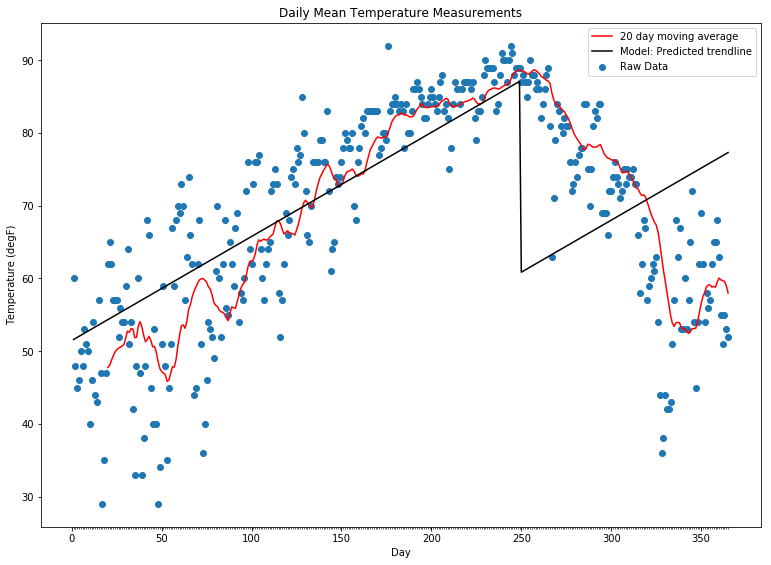

In [9]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);

# Temp measurements
ax.scatter(df_first_year.DayOfYear, df_first_year.TempAvgF, label='Raw Data');
ax.plot(df_first_year.DayOfYear, rolling, c='r', label=f'{window} day moving average');
ax.plot(df_first_year.DayOfYear, trend_y, c='k', label='Model: Predicted trendline')

ax.set_title('Daily Mean Temperature Measurements')
ax.set_xlabel('Day')
ax.set_ylabel('Temperature (degF)')
ax.set_xticks(range(1, 366), 10)
ax.legend();

Do the predictions provided by the trendline look reasonable?